In [29]:
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt

df = pd.read_csv('heart failure.csv')


In [30]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
df.shape

(299, 13)

In [32]:
df.DEATH_EVENT.value_counts()



0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

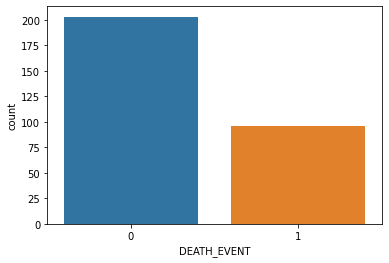

In [33]:
ses.countplot(x = 'DEATH_EVENT',data = df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

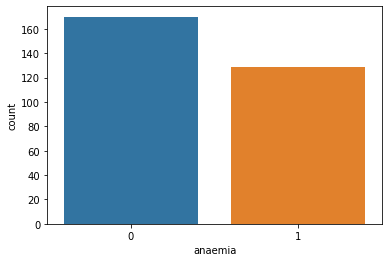

In [34]:
ses.countplot(x = 'anaemia',data = df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

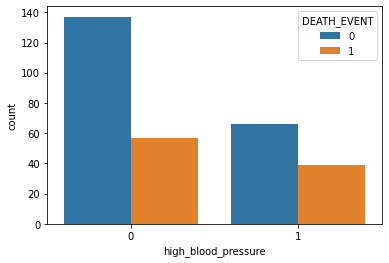

In [35]:
ses.countplot(x = 'high_blood_pressure',data = df ,hue = 'DEATH_EVENT')

<AxesSubplot:xlabel='anaemia', ylabel='count'>

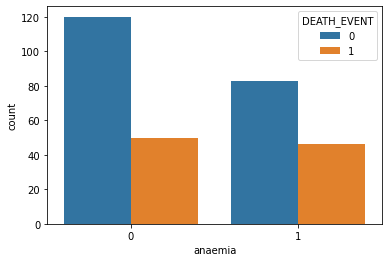

In [36]:
ses.countplot(x = 'anaemia',data = df ,hue = 'DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

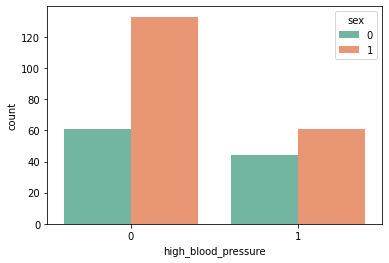

In [37]:
ses.countplot(x='high_blood_pressure',data=df,hue='sex',palette='Set2') 

In [38]:
x = df.drop('DEATH_EVENT',axis =1)
y = df['DEATH_EVENT']





In [39]:
x.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [40]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [41]:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=30)
# xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=.30)

In [42]:
xtest.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
73,65.0,0,224,1,50,0,149000.00,1.30,137,1,1,72
47,60.0,0,582,1,38,1,451000.00,0.60,138,1,1,40
257,58.0,0,132,1,38,1,253000.00,1.00,139,1,0,230
119,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95
51,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43


In [43]:
ytest.head(5)

73     0
47     1
257    0
119    1
51     1
Name: DEATH_EVENT, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)



DecisionTreeClassifier()

# Evaluate Model

In [45]:
# dt.score(xtest,ytest)
dt.score(x,y)

0.979933110367893

In [46]:
pred = dt.predict(xtest)


In [47]:
pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
ytest

73     0
47     1
257    0
119    1
51     1
27     1
200    0
219    0
13     1
16     1
278    0
134    0
78     0
202    0
177    0
85     0
36     1
18     1
160    0
156    0
113    1
215    0
65     1
212    0
32     1
39     1
216    0
139    0
239    0
97     0
Name: DEATH_EVENT, dtype: int64

In [49]:
# from sklearn.metrics import classification_report , accuracy_score, confusion_metrix , plot_roc_curve
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve


cls_r = classification_report(ytest,pred)

cls_r


'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84        18\n           1       0.80      0.67      0.73        12\n\n    accuracy                           0.80        30\n   macro avg       0.80      0.78      0.78        30\nweighted avg       0.80      0.80      0.80        30\n'

In [50]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.80      0.67      0.73        12

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [51]:
cf_m  =  confusion_matrix(ytest,pred)

cf_m
    

array([[16,  2],
       [ 4,  8]], dtype=int64)

<AxesSubplot:>

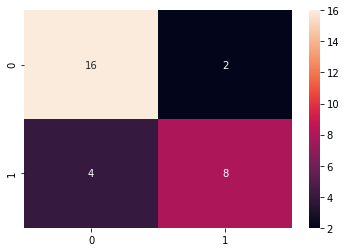

In [52]:
ses.heatmap(cf_m,annot=True)

In [56]:
(20+5) / (20+5+3+2)

0.8333333333333334

In [66]:
tp, fn, fp, tn  = confusion_matrix(ytest,pred).reshape(-1)



In [67]:
tp

16

In [68]:
fn

2

In [69]:
fp

4

In [70]:
tn

8

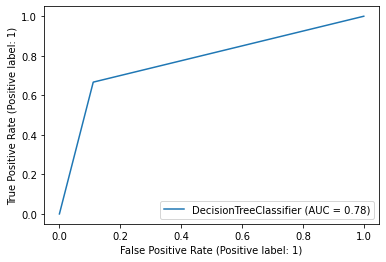

In [72]:
plot_roc_curve(dt,xtest,ytest)

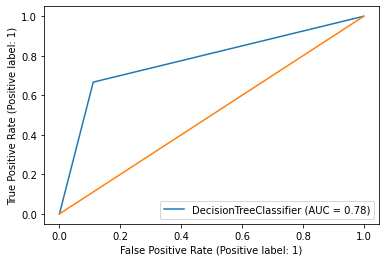

In [74]:
plot_roc_curve(dt,xtest,ytest)
plt.plot([0,1],[0,1])